<a href="https://www.kaggle.com/alogomachine/titannic-logistic?scriptVersionId=88111154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [159]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [161]:
train_df = pd.read_csv ('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [163]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [164]:
# 查看缺失值及其比例
per_na = pd.concat([pd.Series(train_df.isna().sum().values),pd.Series((train_df.isna().sum().values / train_df.shape[0])*100)],axis=1)
per_na.columns = ['Na_Counts','percentOfNa']
per_na.index = train_df.columns
per_na

,Na_Counts,percentOfNa
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [165]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [166]:
# 填充缺失值，因为Cabin缺失值比例>20,所以直接删除不考虑
# 而Embarked是类别标签，缺失值较少，所以可以用出现最多的标签去填充
train_data = train_df.copy()#创建副本
train_data = train_data.drop('Cabin',axis=1)
train_data['Embarked'].fillna(max(dict(train_data['Embarked'].value_counts())),inplace=True) 

In [167]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

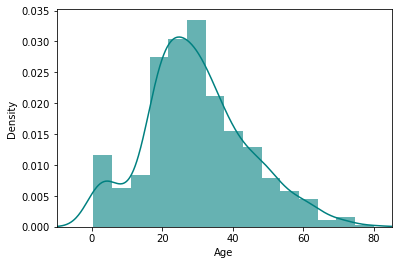

In [168]:
#查看Age分布，看看有无左右偏的情况
ax = train_data['Age'].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_data['Age'].plot(kind='density',color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [169]:
# 有点右偏，所以选择中位数填充好一些
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median(skipna=True))

In [170]:
# 删除
train_data = train_data.drop('Name',axis=1)
train_data = train_data.drop('Ticket',axis=1)
train_data = train_data.drop('PassengerId',axis=1)

In [171]:
# 查看缺失值及其比例
per_na = pd.concat([pd.Series(train_data.isna().sum().values),pd.Series((train_data.isna().sum().values / train_data.shape[0])*100)],axis=1)
per_na.columns = ['Na_Counts','percentOfNa']
per_na.index = train_data.columns
per_na


,Na_Counts,percentOfNa
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


# 处理测试集

In [172]:
test_df = test_df.drop('Name',axis=1)
test_df = test_df.drop('Ticket',axis=1)

In [173]:
# 对测试集来进行处理
# 查看缺失值及其比例
per_na = pd.concat([pd.Series(test_df.isna().sum().values),pd.Series((test_df.isna().sum().values / test_df.shape[0])*100)],axis=1)
per_na.columns = ['Na_Counts','percentOfNa']
per_na.index = test_df.columns
per_na

,Na_Counts,percentOfNa
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,86,20.574163
SibSp,0,0.000000
Parch,0,0.000000
Fare,1,0.239234
Cabin,327,78.229665
Embarked,0,0.000000


In [174]:
# 同样处理
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median(skipna=True))
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median(skipna=True))
test_df = test_df.drop('Cabin',axis=1)
per_na = pd.concat([pd.Series(test_df.isna().sum().values),pd.Series((test_df.isna().sum().values / test_df.shape[0])*100)],axis=1)
per_na.columns = ['Na_Counts','percentOfNa']
per_na.index = test_df.columns
per_na

,Na_Counts,percentOfNa
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


# 查看特征

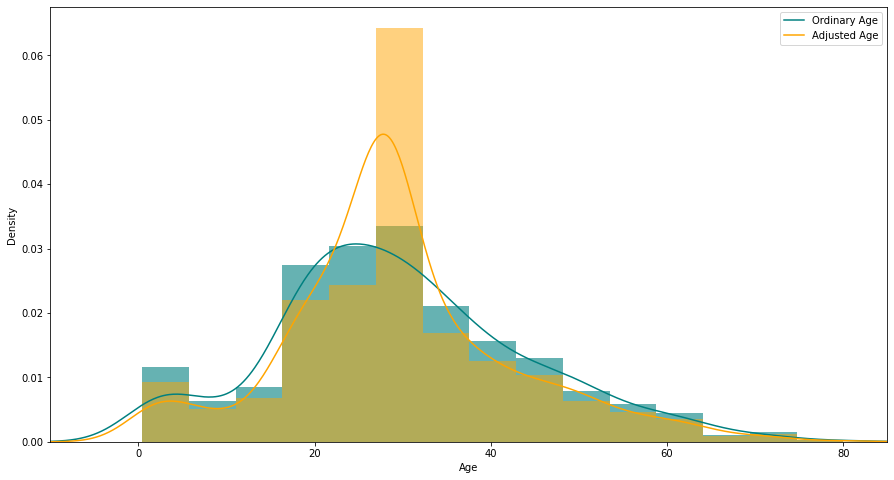

In [175]:
# 查看特征
#填充效果可视化
plt.figure(figsize=(15,8))
ax = train_df['Age'].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
train_df['Age'].plot(kind='density',color='teal')
ax = train_data['Age'].hist(bins=15,density=True,stacked=True,color='orange',alpha=0.5)
train_data['Age'].plot(kind='density',color='orange')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.legend(['Ordinary Age','Adjusted Age'])
plt.show()

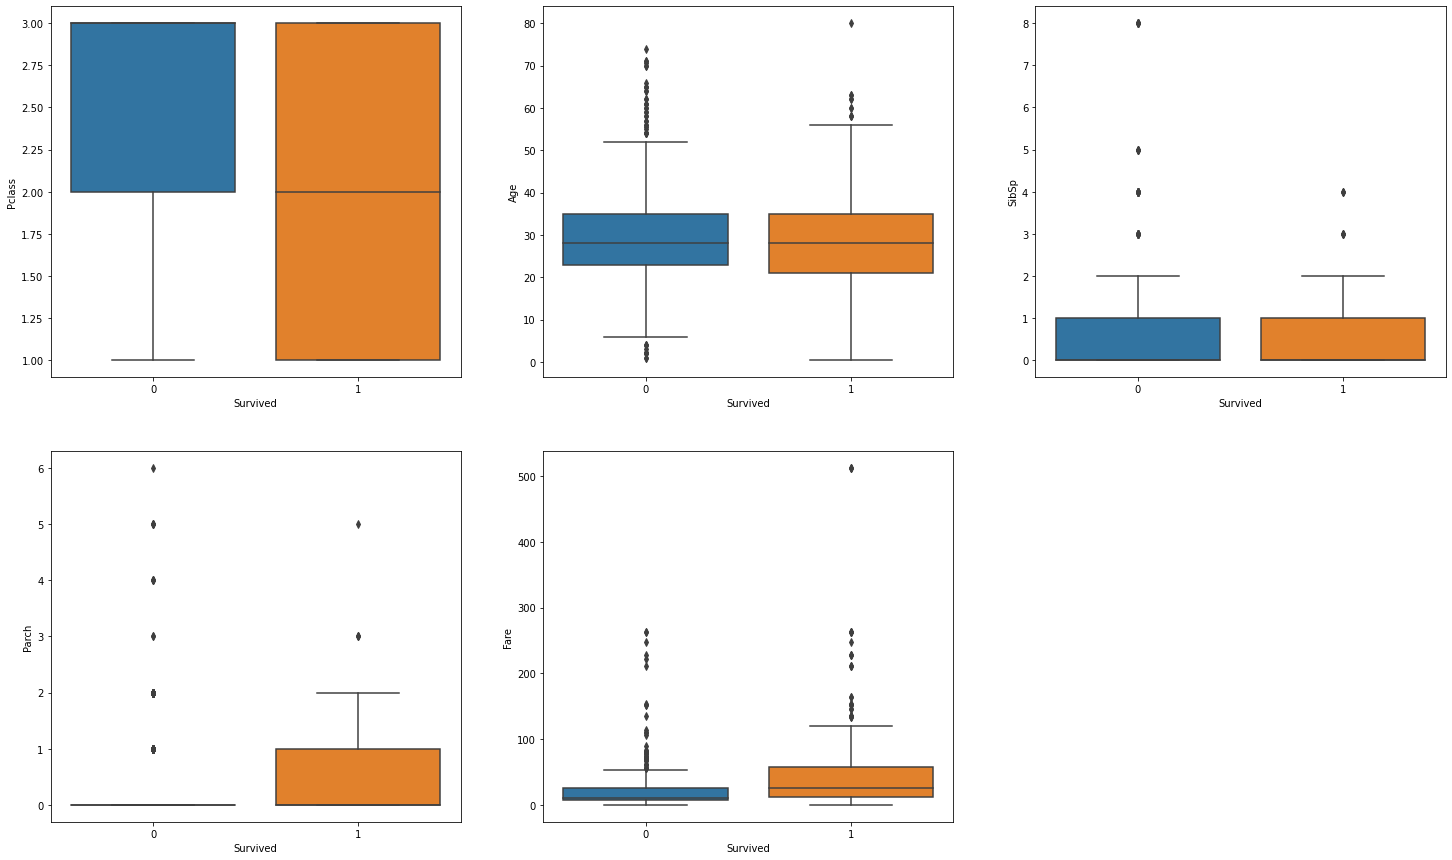

In [176]:
# 异常值处理
#box plot overallqual/saleprice
list1 = []
for i in train_data.columns.tolist()[1:]:
    if i not in train_data.columns[train_data.dtypes =='object'].tolist():
        list1.append(i)
plt.figure(figsize=(25,15))
for i in range(len(list1)):
    ax = plt.subplot(231+i)
    sns.boxplot(x='Survived',y=list1[i],data=train_data)

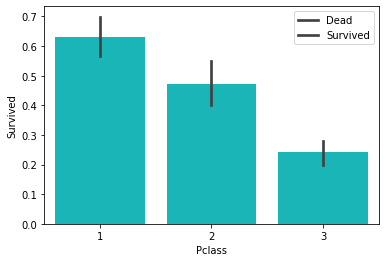

In [177]:
sns.barplot('Pclass',y='Survived',data=train_data,color="darkturquoise")
plt.legend(['Dead','Survived'])
plt.show()

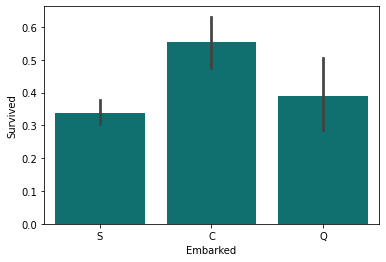

In [178]:
sns.barplot('Embarked', 'Survived', data=train_data, color="teal")
plt.show()

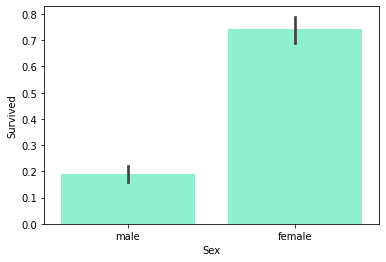

In [179]:
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

In [180]:
train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [181]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

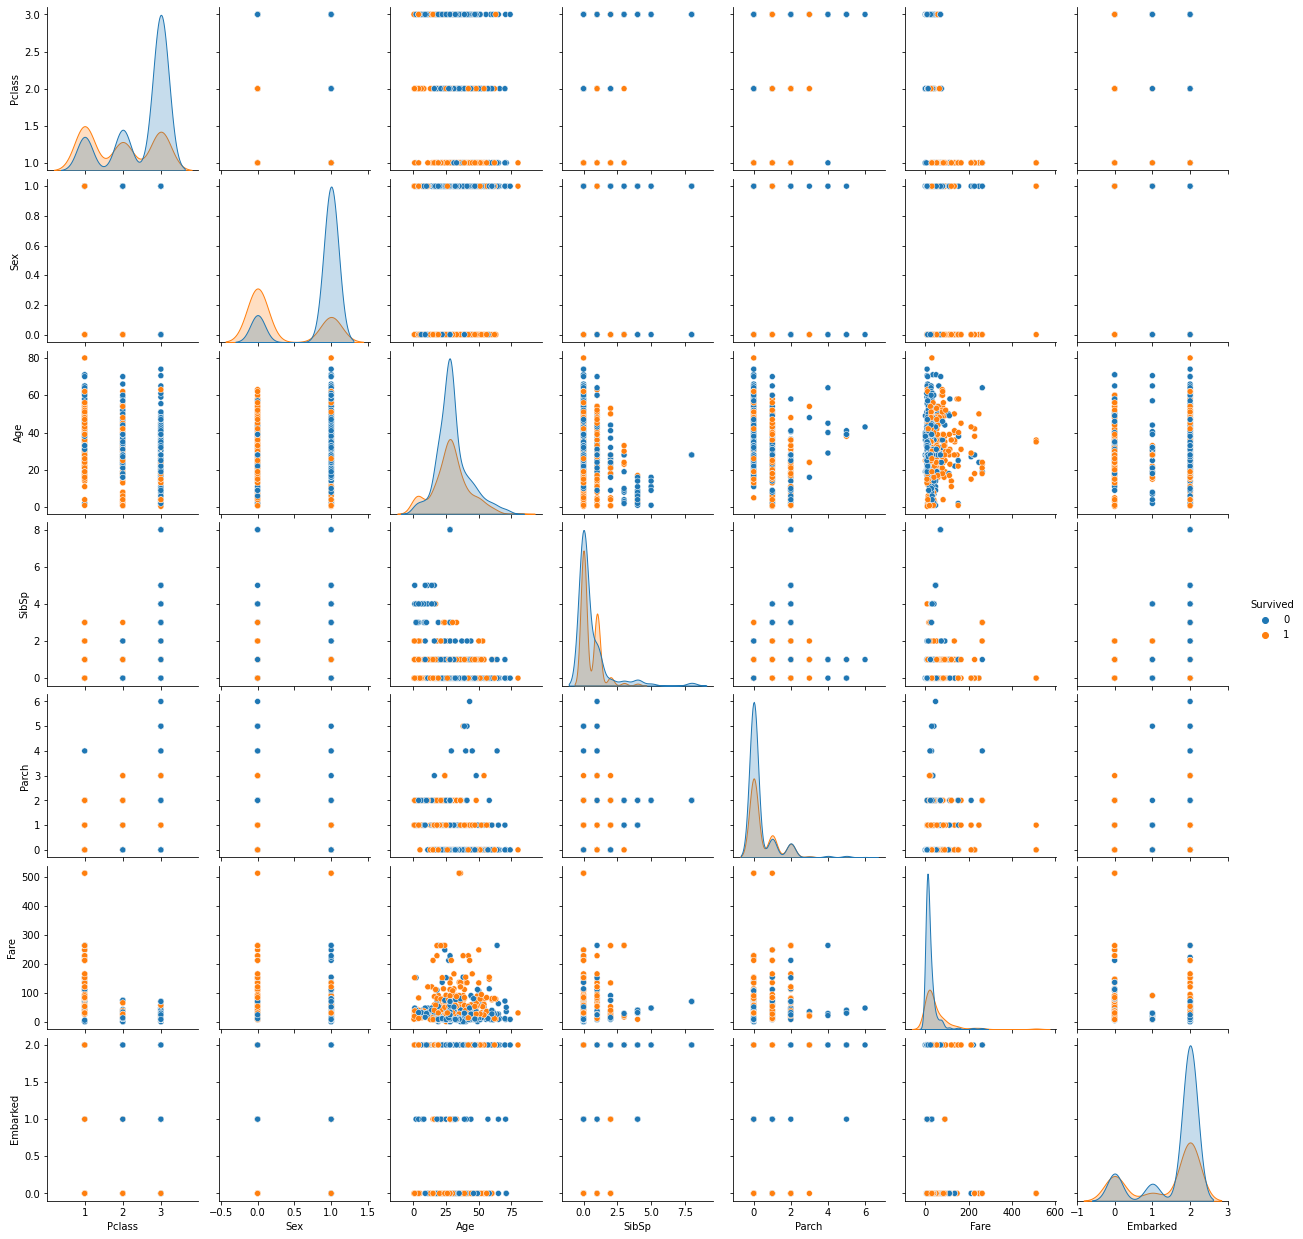

In [182]:
from sklearn import preprocessing
f_names = ['Sex','Embarked']
train_data_Enlabel = train_data.copy()
for x in f_names:
    label = preprocessing.LabelEncoder()
    train_data_Enlabel[x] = label.fit_transform(train_data_Enlabel[x])
feature_col = train_data_Enlabel.columns
feature_col = feature_col.tolist()
sns.pairplot(train_data_Enlabel[feature_col],hue="Survived")

In [183]:
# 独热编码化
label_list = list(dict(train_data.dtypes[train_data.dtypes =='object']).keys())
train_data = pd.concat([train_data,pd.get_dummies(train_data[label_list])],axis=1)
train_data = train_data.drop(label_list,axis=1)

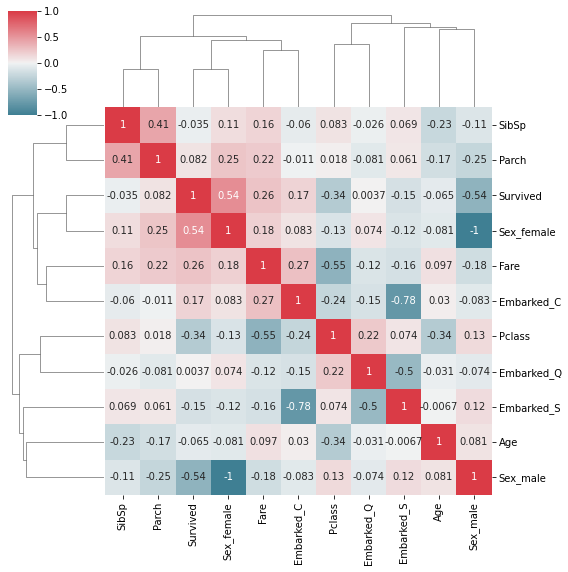

In [184]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # 设置配色
ax=sns.clustermap(train_data.corr(),cmap=cmap,figsize=(8,8),annot=True)

In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 1)
x = train_data[['SibSp', 'Parch']]
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
train_data['PCA_sibspAndParch'] = principalComponents

In [186]:
import sklearn
sklearn.__version__

'0.23.2'

In [187]:
# pip install -U scikit-learn
#要升级kaggle里面的sklearn版本，不然会报错，
# kaggle环境版本太低了，所以直接在下面写了输出结果


# from sklearn.feature_selection import RFECV
# from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE
# # Create the RFE object and compute a cross-validated score.
# # The "accuracy" scoring is proportional to the number of correct classifications
# X = train_data[train_data.columns[1:]]
# X = X.astype('float64')
# y = train_data['Survived']
# rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=5, scoring='accuracy')
# rfecv.fit(X, y)

# print("Optimal number of features: %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X.columns[rfecv.support_]))

# # Plot number of features VS. cross-validation scores
# plt.figure(figsize=(10,6))
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (nb of correct classifications)")
# plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
# plt.show()


#输出的结果是：
# Optimal number of features: 9
#Selected features: ['Pclass', 'Age', 'SibSp', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'PCA_sibspAndParch']

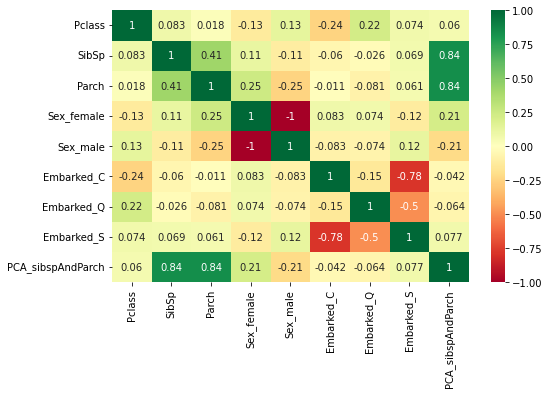

In [188]:
Selected_features = ['Pclass', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'PCA_sibspAndParch']
X = train_data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()
# sibSp 和Parch相关系数比较高，删掉1个或降维

In [189]:
fe_list=['Pclass', 'Age', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S','PCA_sibspAndParch']

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.10001))])
best params: {'clf__C': 0.10001}
best score: 0.7995392630719981


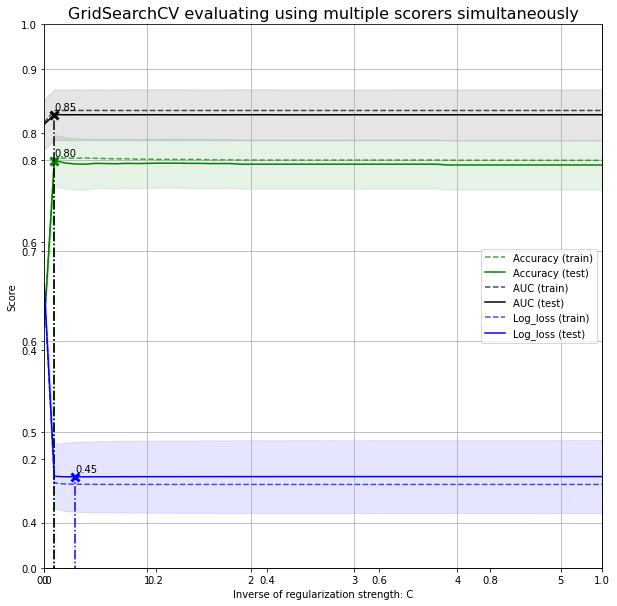

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

X = train_data[fe_list]
X = StandardScaler().fit_transform(X)
y = train_data['Survived']

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2022)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [191]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components = 1)
x = test_df[['SibSp', 'Parch']]
x = StandardScaler().fit_transform(x)
principalComponents = pca.fit_transform(x)
test_df['PCA_sibspAndParch'] = principalComponents
test_df = pd.concat([test_df,pd.get_dummies(test_df[['Sex','Embarked']])],axis=1)
final_test=pd.DataFrame()
final_test['PassengerId'] = test_df['PassengerId']
final_test['Survived'] = log_clf.predict(StandardScaler().fit_transform(test_df[fe_list]))


submission = final_test[['PassengerId','Survived']]

submission.to_csv("submission.csv", index=False)

submission.tail()


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [192]:
x_train, x_test, y_train, y_test = train_test_split(train_data[train_data.columns[1:]], train_data[train_data.columns[0]], test_size=0.3, random_state=42)

# 随机森林调参

In [193]:
rfc=RandomForestClassifier(random_state=2022)

In [194]:
param_grid = { 
    'n_estimators': list(range(1,11)),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [195]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [196]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 7}

In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(random_state=2022, criterion='gini',max_depth=5,max_features='auto',n_estimators= 10)

In [198]:
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8022388059701493


In [199]:
op_rf=rfc1.predict(test_df.drop(['Sex','Embarked'],axis=1).iloc[:,1:][x_train.columns])

In [200]:
op=pd.DataFrame(test_df['PassengerId'])
op['Survived']=op_rf
op.to_csv("op_rf.csv", index=False)

# 模型融合

In [201]:
op_rf=rfc1.predict_proba(test_df.drop(['Sex','Embarked'],axis=1).iloc[:,1:][x_train.columns])
log_clf = log_clf.predict_proba(StandardScaler().fit_transform(test_df[fe_list]))

In [202]:
df_result = pd.DataFrame(op_rf+log_clf) #直接把两个模型预测的概率相加

In [203]:
df_result

,0,1
0,1.797074,0.202926
1,1.025773,0.974227
2,1.720657,0.279343
3,1.698719,0.301281
4,0.931872,1.068128
...,...,...
413,1.698719,0.301281
414,0.099075,1.900925
415,1.817591,0.182409
416,1.698719,0.301281


In [204]:
ave_result=pd.DataFrame()
ave_result['PassengerId'] =test_df['PassengerId']
ave_result['Survived'] = df_result.idxmax(1) # 取出概率的分类类别

In [205]:
ave_result.to_csv('./ave_result.csv',index=False)